In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## E-Bike Analysis

In [137]:
df1 = pd.read_csv("data\E-Bike\Electric 2-Wheeler Sales.csv")

In [138]:
df1.head(15)

,type,financial_year,month,num_vehicles
0,E-2 Wheelers,2017-18,Apr,96
1,E-2 Wheelers,2017-18,May,91
2,E-2 Wheelers,2017-18,Jun,137
3,E-2 Wheelers,2017-18,Jul,116
4,E-2 Wheelers,2017-18,Aug,99
5,E-2 Wheelers,2017-18,Sep,109
6,E-2 Wheelers,2017-18,Oct,150
7,E-2 Wheelers,2017-18,Nov,214
8,E-2 Wheelers,2017-18,Dec,179
9,E-2 Wheelers,2017-18,Jan,173


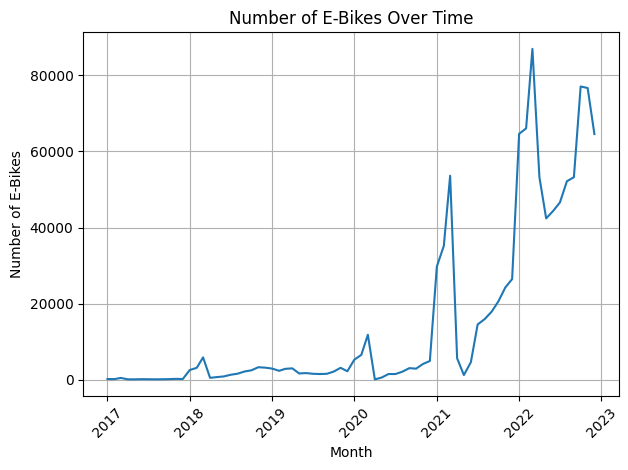

In [139]:
df1['date'] = pd.to_datetime(df1['financial_year'].str[:4] + '-' + df1['month'], format='%Y-%b')

# Aggregate number of vehicles per month across all financial years
monthly_data = df1.groupby('date')['num_vehicles'].sum()

plt.plot(monthly_data.index, monthly_data.values, linestyle='-')

plt.xlabel('Month')
plt.ylabel('Number of E-Bikes')
plt.title('Number of E-Bikes Over Time')

plt.xticks(rotation=45)

plt.grid(True)  
plt.tight_layout()  
plt.show()

### Market Share over the years

In [140]:
year_19_20 = pd.read_csv("data\E-Bike\EV 2W FY 19-20.csv")
year_20_21 = pd.read_csv("data\E-Bike\EV 2W FY 20-21.csv")
year_21_22 = pd.read_csv("data\E-Bike\EV 2W FY 21-22.csv")
year_22_23 = pd.read_csv("data\E-Bike\EV 2W FY 22-23.csv")

years = [year_19_20, year_20_21, year_21_22, year_22_23]

In [141]:
year_19_20.head()

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,Hero Electric,0.3,Apr,1776
1,2019-20,Hero Electric,0.3,May,455
2,2019-20,Hero Electric,0.3,Jun,329
3,2019-20,Hero Electric,0.3,Jul,260
4,2019-20,Hero Electric,0.3,Aug,249


In [142]:
data = year_19_20[["maker","market_share"]]

In [143]:
data = data.drop_duplicates(subset=['maker'])

In [144]:
data.head()

,maker,market_share
0,Hero Electric,0.30
12,Okinawa Autotech,0.38
24,Ather Energy,0.11
36,Ampere Vehicles,0.09
48,Revolt,0.04


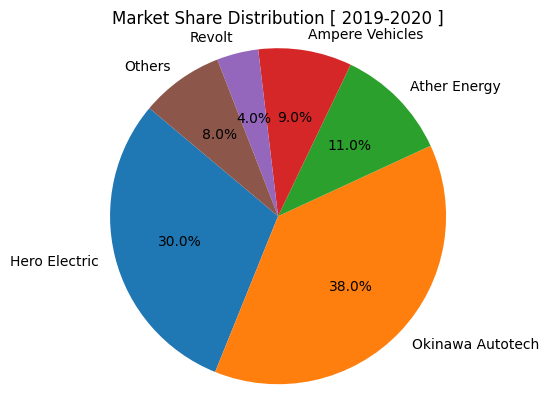

In [145]:
plt.pie(data["market_share"], labels=data["maker"], autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Market Share Distribution [ 2019-2020 ]')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

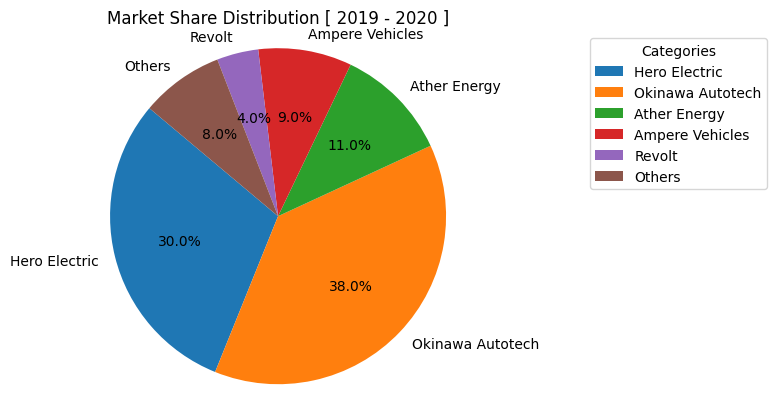

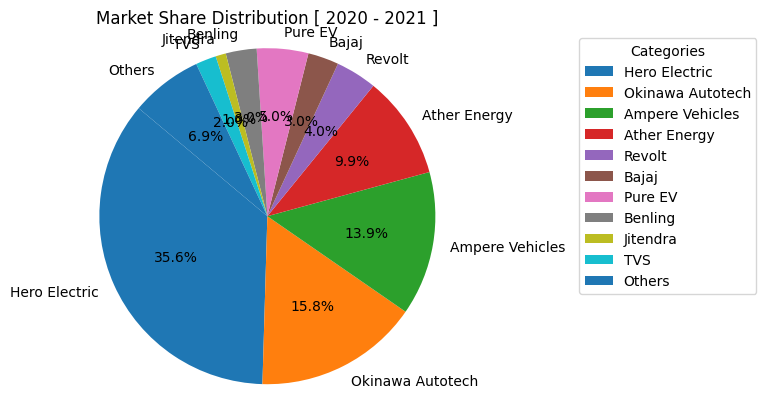

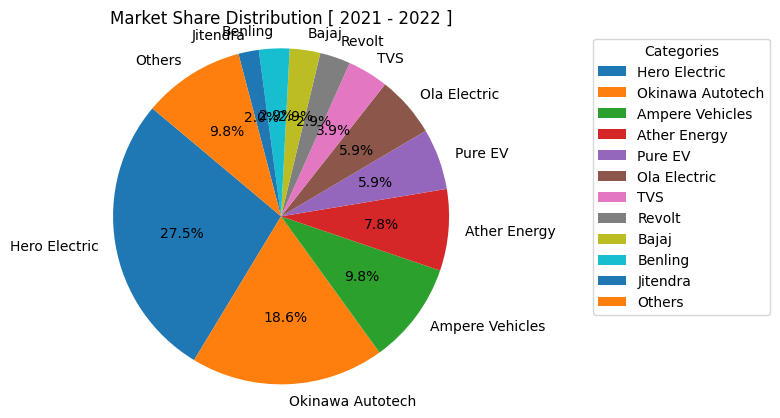

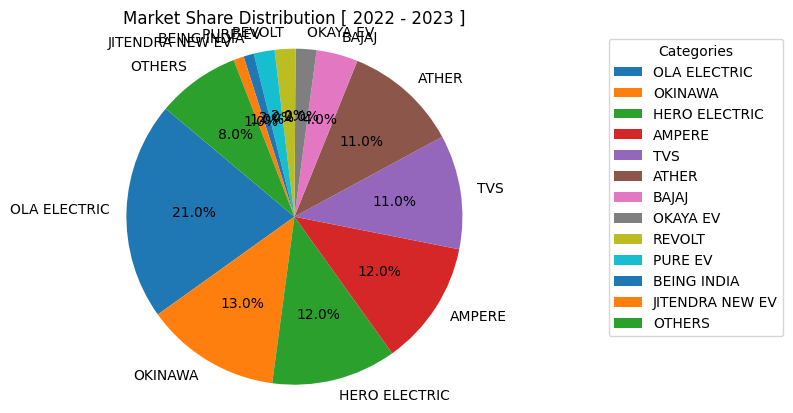

In [146]:
x = 2019
for i in years:
    data = i[["maker","market_share"]]
    
    data = data.drop_duplicates(subset=['maker'])

    plt.pie(data["market_share"], labels=data["maker"], autopct='%1.1f%%', startangle=140)

    plt.legend(title="Categories", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title(f'Market Share Distribution [ {x} - {x+1} ]')
    x+=1

    plt.axis('equal')
    plt.show()

In [147]:
df2 = pd.read_csv("data\E-Bike\ev2_bikewale.csv")

## Customer Satisfaction Analysis

In [148]:
df2.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [149]:
df2["Model Name"].unique()

array(['TVS iQube', 'Revolt RV 400', 'Bajaj Chetak', 'OLA S1 Pro',
       'Ather 450X', 'Hero Electric Optima', 'Tork Kratos', 'OLA S1',
       'Bounce Infinity E1', 'Hero Electric Optima CX',
       'Hero Electric Flash', 'Ampere Magnus EX', 'Revolt RV 300',
       'Hero Electric Photon', 'Okinawa Praise', 'Benling Aura',
       'Ampere Magnus Pro', 'PURE EV EPluto 7G', 'Ampere REO',
       'Odysse Evoqis', 'Hero Electric NYX HX', 'Okinawa i-Praise',
       'Joy e-bike Monster', 'PURE EV ETrance Neo', 'Evolet Polo',
       'Okinawa Ridge Plus', 'Ampere Zeal', 'Hero Electric Atria',
       'Okinawa Lite', 'Hero Electric NYX', 'Okinawa R30', 'Yo Drift',
       'BGauss B8', 'Joy e-bike Wolf', 'Gemopai Astrid Lite',
       'Techo Electra Emerge', 'Techo Electra Raptor', 'e-bike Gen Nxt',
       'Gemopai Ryder'], dtype=object)

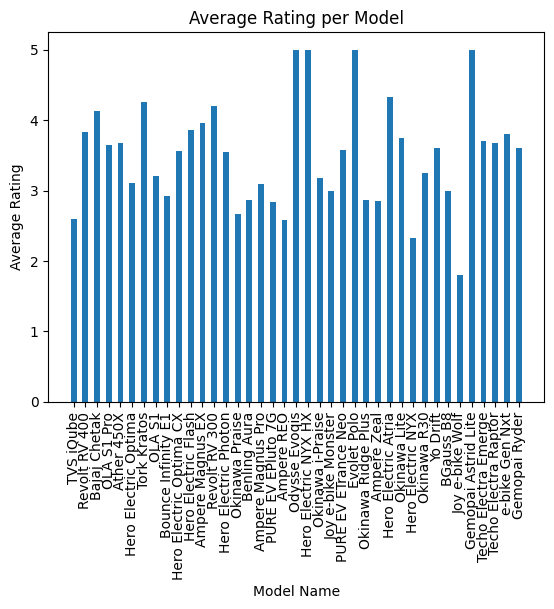

In [150]:
model_name = ['TVS iQube', 'Revolt RV 400', 'Bajaj Chetak', 'OLA S1 Pro',
       'Ather 450X', 'Hero Electric Optima', 'Tork Kratos', 'OLA S1',
       'Bounce Infinity E1', 'Hero Electric Optima CX',
       'Hero Electric Flash', 'Ampere Magnus EX', 'Revolt RV 300',
       'Hero Electric Photon', 'Okinawa Praise', 'Benling Aura',
       'Ampere Magnus Pro', 'PURE EV EPluto 7G', 'Ampere REO',
       'Odysse Evoqis', 'Hero Electric NYX HX', 'Okinawa i-Praise',
       'Joy e-bike Monster', 'PURE EV ETrance Neo', 'Evolet Polo',
       'Okinawa Ridge Plus', 'Ampere Zeal', 'Hero Electric Atria',
       'Okinawa Lite', 'Hero Electric NYX', 'Okinawa R30', 'Yo Drift',
       'BGauss B8', 'Joy e-bike Wolf', 'Gemopai Astrid Lite',
       'Techo Electra Emerge', 'Techo Electra Raptor', 'e-bike Gen Nxt',
       'Gemopai Ryder']

rating = []
#Average Rating for every moedel of E-Bike
for i in model_name:
    data = df2["rating"].loc[df2["Model Name"] == i].mean().round(2)
    rating.append(data)

plt.bar(model_name, rating, width=0.5)

plt.xlabel('Model Name')
plt.ylabel('Average Rating')
plt.title('Average Rating per Model')

plt.xticks(rotation=90)

plt.show()

In [151]:
rating_by_model = dict(zip(model_name, rating))

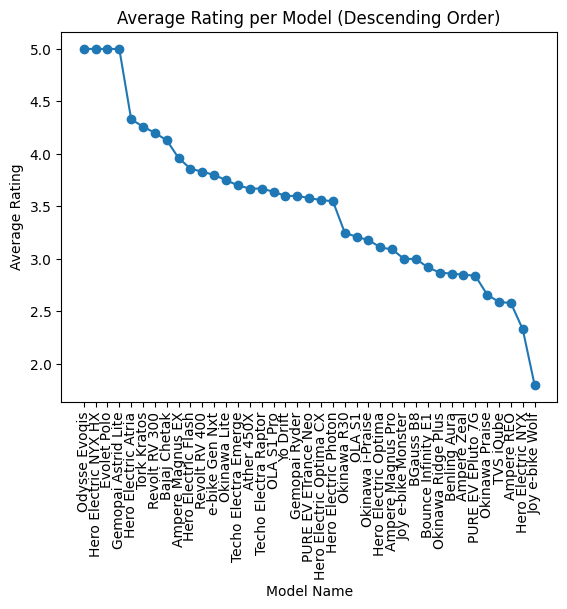

In [152]:
rating_by_model = dict(sorted(rating_by_model.items(), key=lambda item: item[1], reverse=True))

# Extract keys and values from the dictionary
keys = list(rating_by_model.keys())
values = list(rating_by_model.values())

# Create line chart
plt.plot(keys, values, marker='o')

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Average Rating')
plt.title('Average Rating per Model (Descending Order)')
plt.xticks(rotation=90)

# Show plot
plt.show()

## 4-Wheelers Analysis

In [153]:
df = pd.read_csv("data\E-4wheelers\Electric 4-Wheeler Sales.csv")

In [154]:
df.head()

,type,financial_year,month,num_vehicles
0,E-4 Wheelers,2017-18,Apr,198
1,E-4 Wheelers,2017-18,May,215
2,E-4 Wheelers,2017-18,Jun,149
3,E-4 Wheelers,2017-18,Jul,120
4,E-4 Wheelers,2017-18,Aug,137


In [155]:
df["num_vehicles"].max()

8852

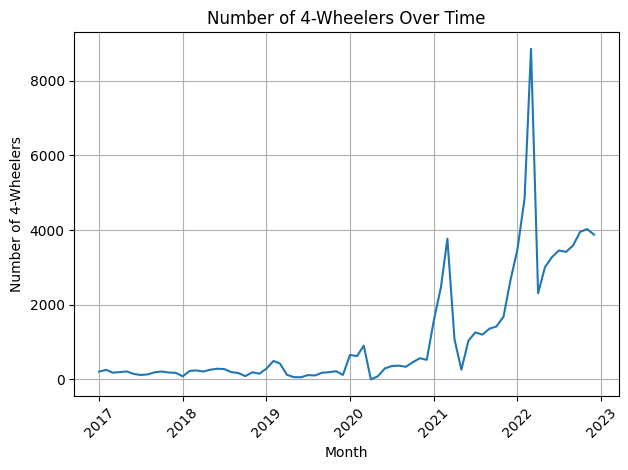

In [156]:
df['date'] = pd.to_datetime(df1['financial_year'].str[:4] + '-' + df1['month'], format='%Y-%b')

# Aggregate number of vehicles per month across all financial years
monthly_data = df.groupby('date')['num_vehicles'].sum()

plt.plot(monthly_data.index, monthly_data.values, linestyle='-')

plt.xlabel('Month')
plt.ylabel('Number of 4-Wheelers')
plt.title('Number of 4-Wheelers Over Time')

plt.xticks(rotation=45)

plt.grid(True)  
plt.tight_layout()  
plt.show()

In [157]:
df1 = pd.read_csv("data\E-4wheelers\EV_cars_India_2023.csv")

In [159]:
df1.head()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN


In [160]:
price = df1["Car_price"]
price

0              7.98  lakh
1      8.69 - 11.99  lakh
2     12.49 - 13.75  lakh
3     23.38 - 27.40  lakh
4     33.99 - 34.49  lakh
5     23.84 - 24.03  lakh
6     15.99 - 18.99  lakh
7     16.49 - 19.54  lakh
8         1.59 - 2.4 lakh
9                  1.7 cr
10    73.90 - 77.50  lakh
11            29.15  lakh
12        1.53 - 2.3 lakh
13                 1.9 cr
14      9.13 - 9.46  lakh
15             4.50  lakh
16    14.49 - 17.19  lakh
17            44.95  lakh
18    60.95 - 65.95  lakh
19                 1.2 cr
20                 1.9 cr
21            52.50  lakh
22        1.02 - 1.2 lakh
23    11.50 - 12.76  lakh
24            56.90  lakh
25        1.20 - 1.2 lakh
26            39.50  lakh
27             4.79  lakh
28            74.50  lakh
29            99.50  lakh
Name: Car_price, dtype: object